# Load Library

In [1]:
!pip install ucimlrepo

In [2]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Data

In [3]:
# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)


{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

# EDA

In [4]:
data = pd.concat([X,y], axis=1)
display(data.head())
display(data.sample(5))
display(data.tail())
data.info()

# Menampilkan informasi dasar tentang dataset
print(data.info()) # Informasi tentang dataset
print(data.describe()) # Statistik deskriptif
print(data.head()) # Lihat beberapa baris awal dataset
print(data.isnull().sum()) # Cek missing values

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
4995,L,303.6,312.6,1540,39.8,21,0,0,0,0,0,0
4149,L,301.9,310.4,1603,37.6,69,0,0,0,0,0,0
2169,L,299.5,309.1,1415,49.2,8,0,0,0,0,0,0
7487,L,300.3,311.7,1707,33.6,158,0,0,0,0,0,0
8381,H,298.8,310.0,1530,38.3,53,0,0,0,0,0,0


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         

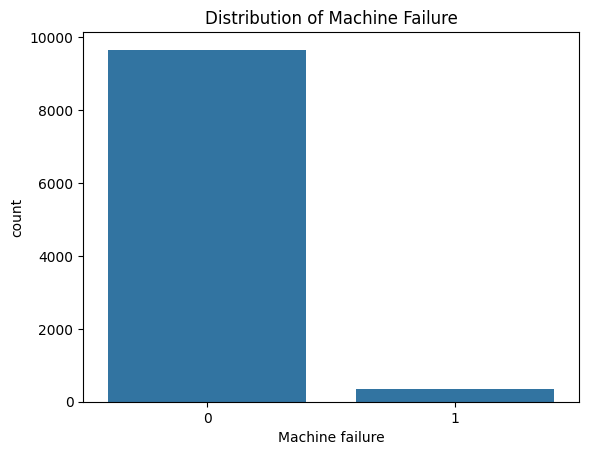

In [5]:
# Visualisasi distribusi target variable
sns.countplot(x='Machine failure', data=data)
plt.title('Distribution of Machine Failure')
plt.show()

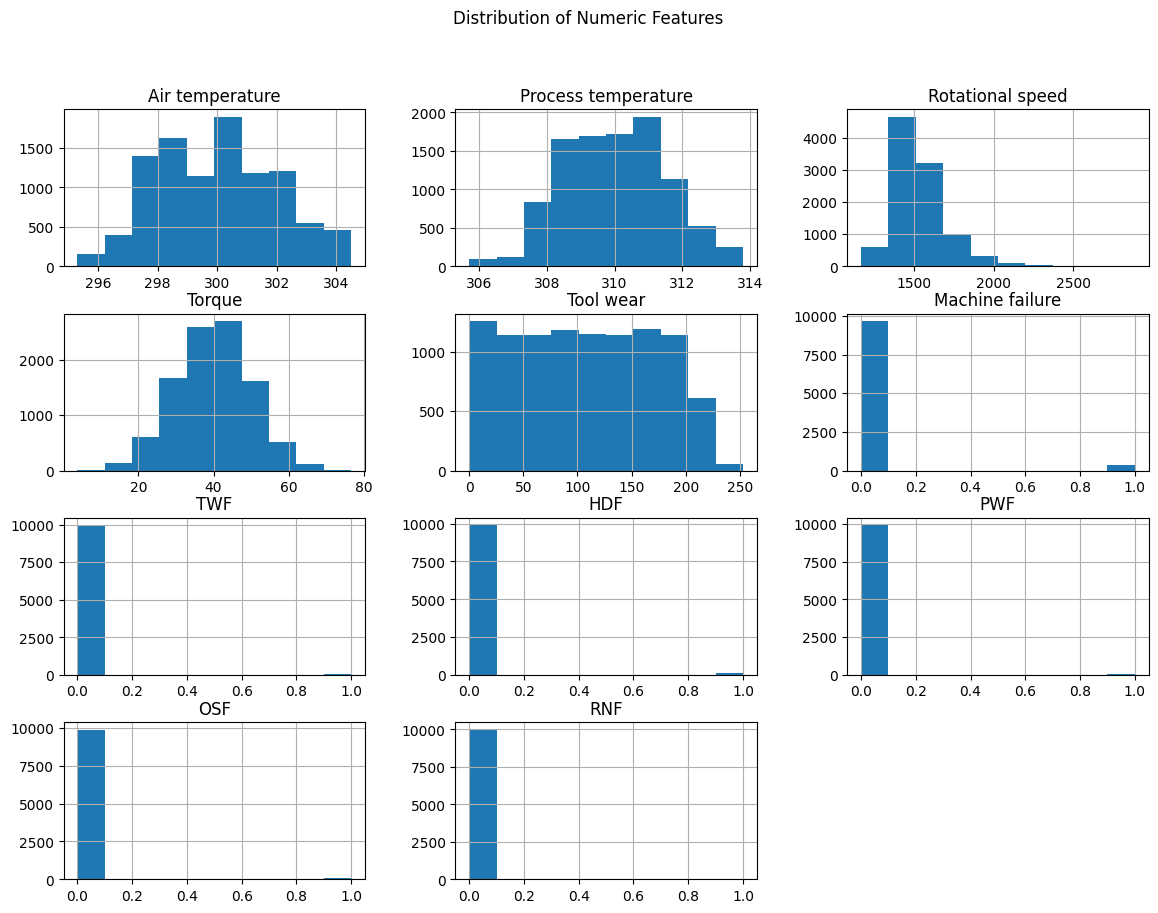

In [6]:
# Visualisasi fitur numerik
data.hist(figsize=(14, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

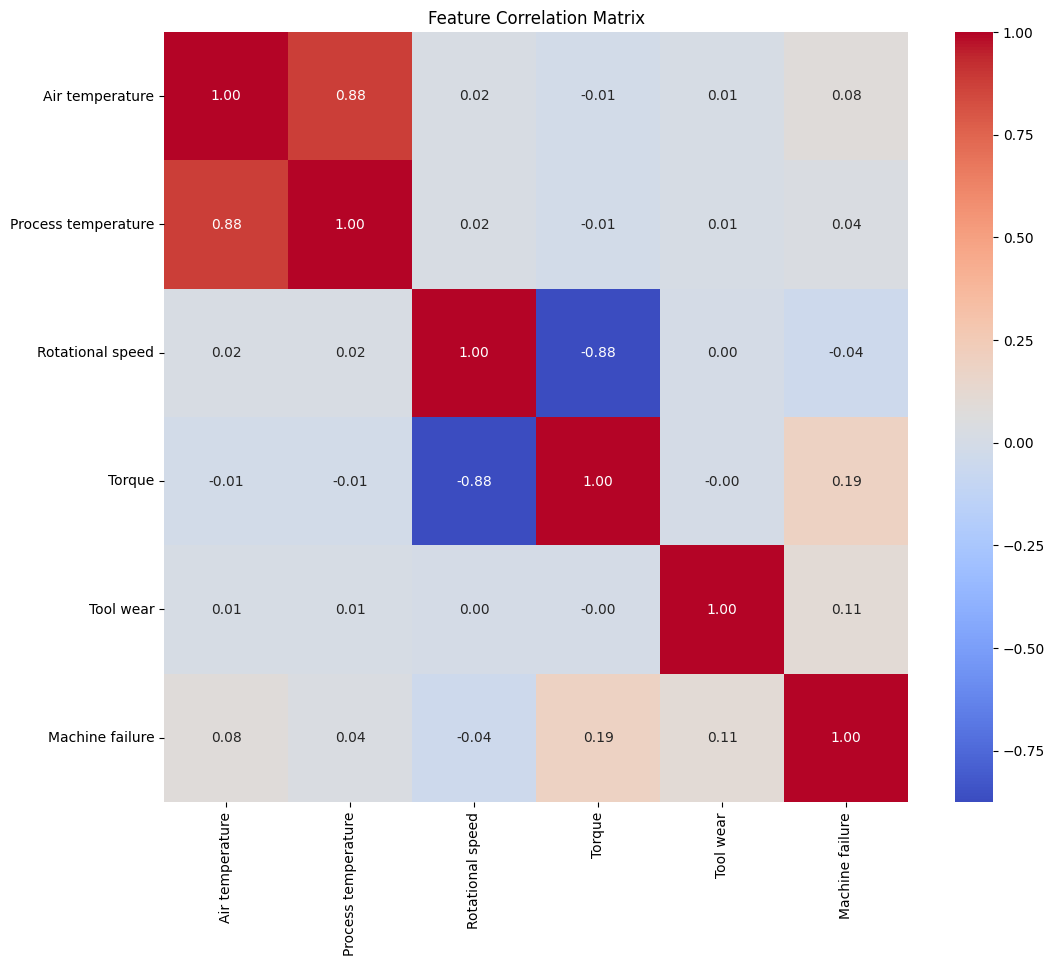

In [7]:
# Korelasi antara fitur
# Hapus kolom yang tidak bisa digunakan untuk korelasi
x = data.drop(['Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# **Data Processing**

In [8]:
# Ubah fitur yang kategorikal menjadi numerik jika diperlukan
data_encoded = pd.get_dummies(data, drop_first=True)

In [9]:
# Pisahkan fitur dan target
X = data_encoded.drop('Machine failure', axis=1)
y = data_encoded['Machine failure']

In [10]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Pemodelan dan Evaluasi Random Forest Classifier**

In [12]:
# Model Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluasi Model Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



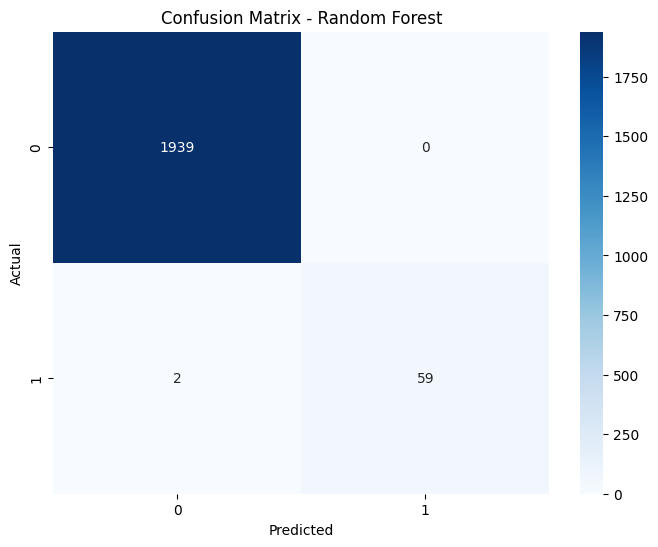

In [13]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# **Pemodelan dan Evaluasi Gradient Boosting Classifier**

In [14]:
# Model Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Evaluasi Model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.98      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



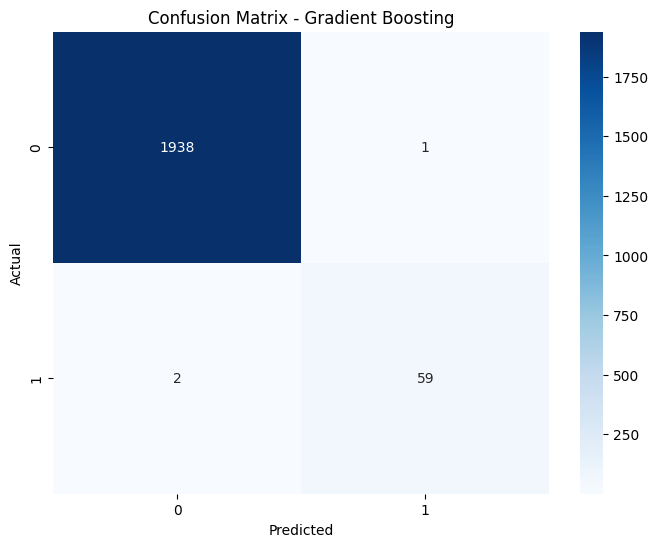

In [15]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


# **Pemodelan dan Evaluasi Linear Regression**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0032930214268711675
R^2 Score: 0.8886354660803298


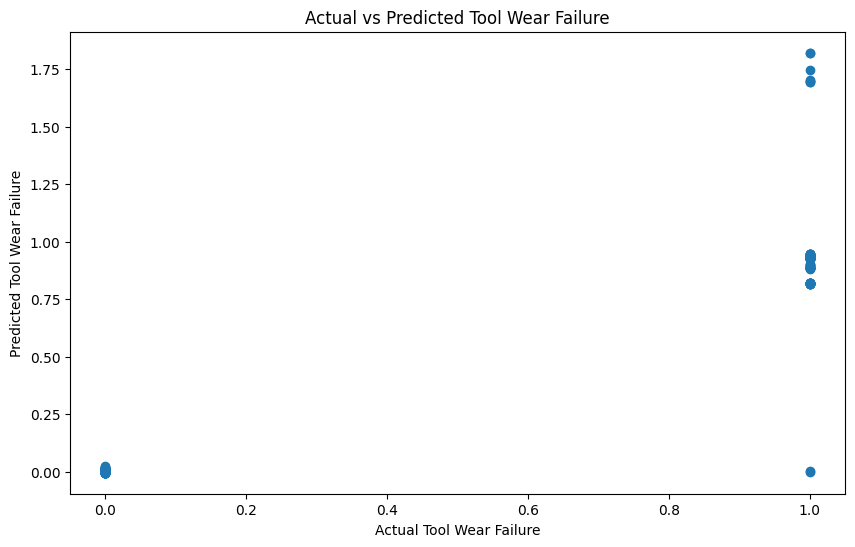

In [17]:
# Visualisasi Hasil Prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tool Wear Failure')
plt.ylabel('Predicted Tool Wear Failure')
plt.title('Actual vs Predicted Tool Wear Failure')
plt.show()


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1939
         1.0       1.00      0.85      0.92        61
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2000
   macro avg       0.67      0.62      0.64      2000
weighted avg       1.00      1.00      1.00      2000



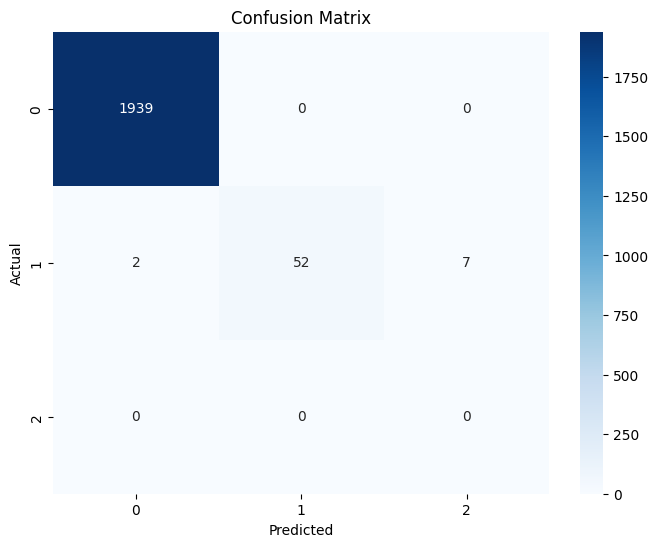

In [18]:
# Konversi y_pred ke dalam format kategorikal
y_pred_cat = np.round(y_pred)

print(classification_report(y_test, y_pred_cat))

conf_matrix = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


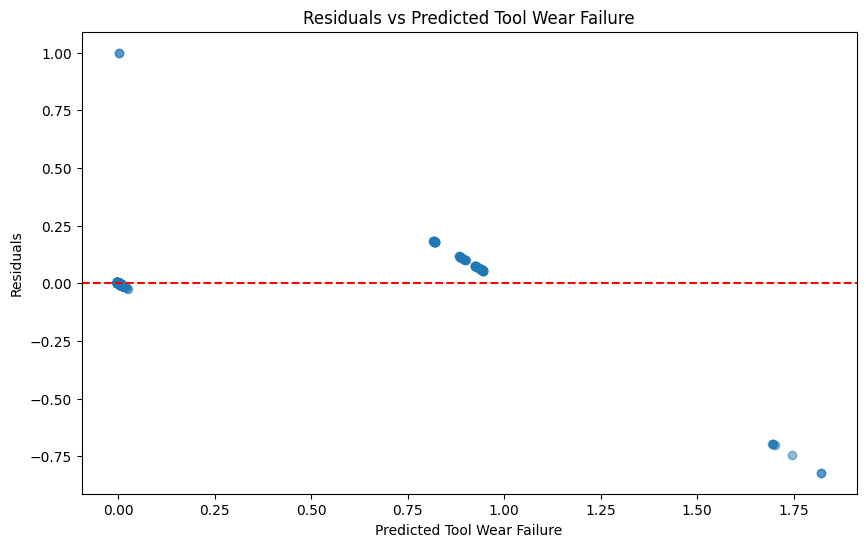

In [19]:
# Menghitung residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tool Wear Failure')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Tool Wear Failure')
plt.show()
